# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

### Solution:

After upgrading the code as prescribed, I performed the 3 MD simulations for the 3 phases, starting from the crystalline configuration. For each case I explored the behaviour of the system as a function of the initial temperature, by performing 10,000 steps long simulations for each value of temperature in the range 0.5 to 2.5 (with step 0.1). The temperature values are given in natural units ($k_B = 1$, $\epsilon = 1$, $\sigma = 1$).

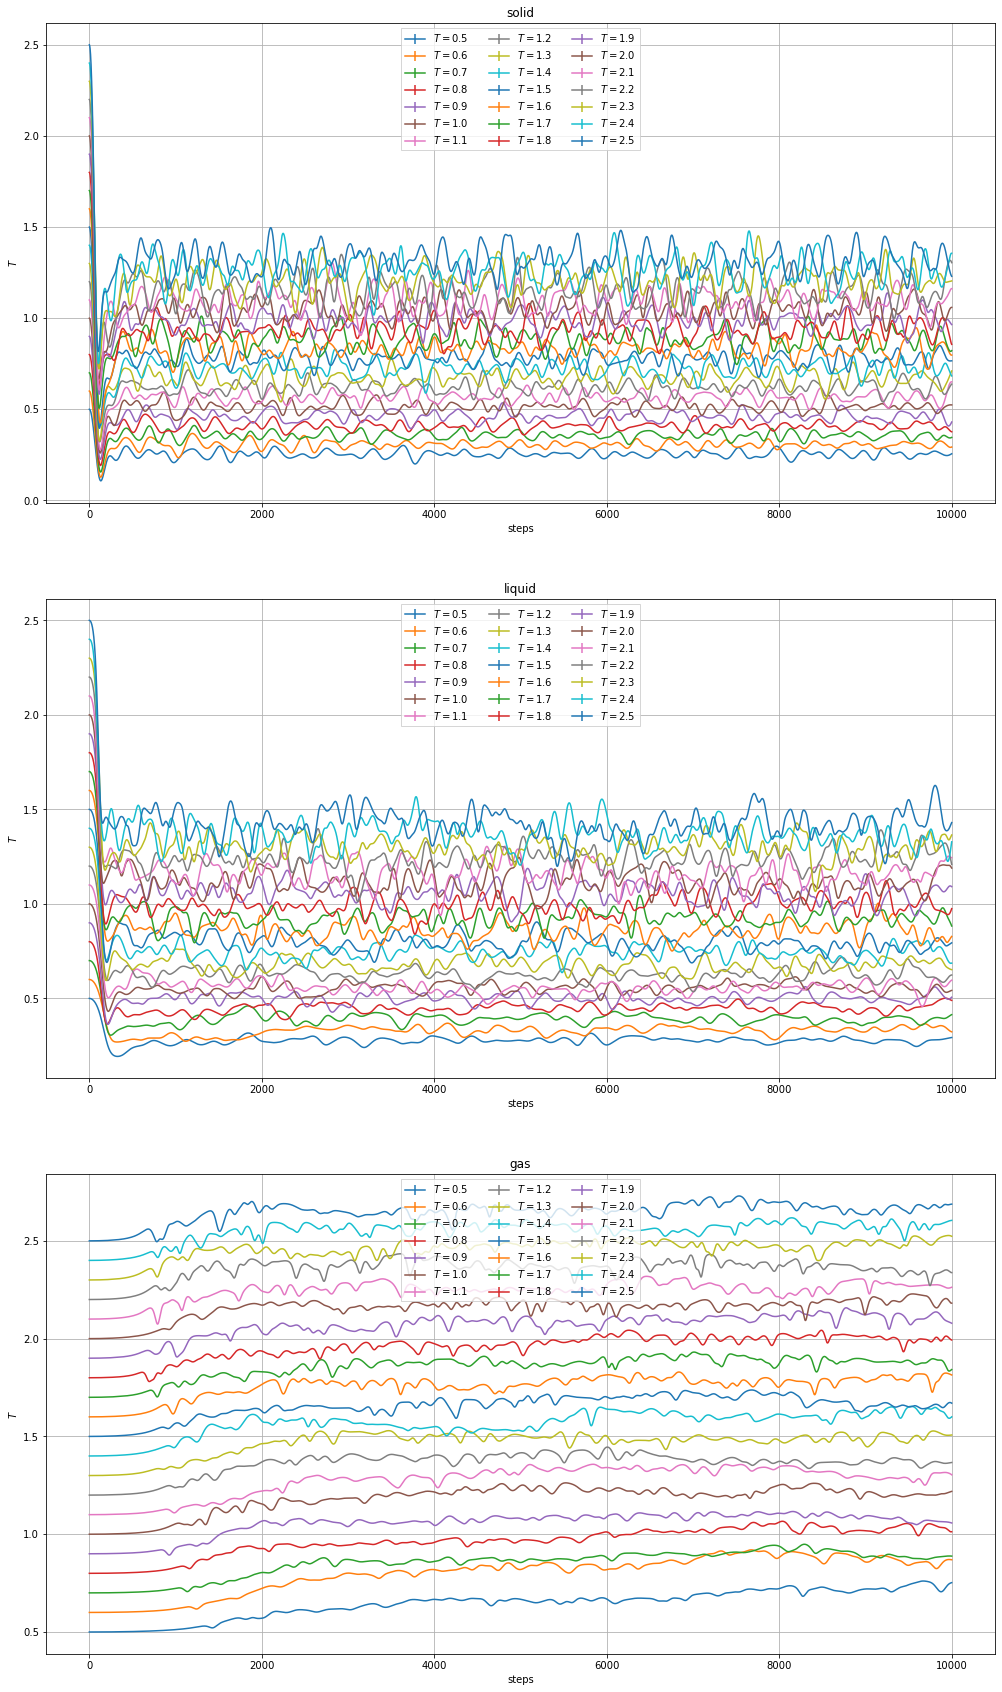

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

phases = ["solid", "liquid", "gas"]

pre_calibration, calibration = dict(), dict()
blocks, cycles = dict(), dict()
for phase in phases:
    pre_calibration[phase] = pd.read_csv(f'md_{phase}_calibration/out/temperature.dat', delimiter='\t')
    #print(pre_calibration[phase])
    blocks[phase] = pre_calibration[phase].iloc[-1, 0]
    cycles[phase] = int(pre_calibration[phase].shape[0] / blocks[phase]) #n of cycles is n of rows / n of blocks
    cycles[phase] = np.arange(cycles[phase])
    
    #create a data frame dictionary to store data frames
    calibration[phase] = {elem : pd.DataFrame() for elem in cycles[phase]}
    for key in calibration[phase].keys():
        calibration[phase][key] = pre_calibration[phase].iloc[blocks[phase] * key : blocks[phase] * (key+1)]

ax = dict()
fig, (ax["solid"], ax["liquid"], ax["gas"]) = plt.subplots(3, 1, figsize=(17,30))
for phase in phases:
    for key in calibration[phase].keys():
        ax[phase].errorbar(calibration[phase][key]['BLOCK:'], calibration[phase][key]['ACTUAL_T:'], yerr=0, label='$T=$' + f'{0.1*(5+key):.1f}')
    ax[phase].set_title(phase)
    ax[phase].set_xlabel('steps')
    ax[phase].set_ylabel('$T$')
    ax[phase].grid(True)
    ax[phase].legend(loc='upper center', ncol=3, fancybox=False)
    
plt.show()

For both the solid and liquid phase, the temperature drops sharply as soon as the simulation starts, and then stabilizes itslef after some $10^3$ steps. For the gas phase, instead, the temperature slowly rises from its starting value up until about halfway through the simulation, and then remains stable.

<span style="color:green"> The reason for this behaviour can be found in the virial theorem: the average over time of the total kinetic energy (which is proportional to the temperature) is related to the average over time of the total potential energy of the system. The relationship between these two quantities is non-trivial for the Lennard-Jones potential, but can be obtained by the general formula: </span>

$$ \left< E_{\text{kinetic}} \right>_t = - \frac 1 2 \sum_k \left< \textbf{F}_k \cdot \textbf{r}_k \right>_t $$

<span style="color:green"> The simulation starts from an initial crystalline configuration, which has a definite potential energy, while the initial kinetic energy depends from the given temperature. The system evolves until it finds an equilibrium between these two types of energy. </span>
    
Assuming the system is already in equilibrium in the last 1000 steps, I considered the mean value of the temperature in this last part of the simulation as the equilibrium temperature, and the standard deviation as the error.

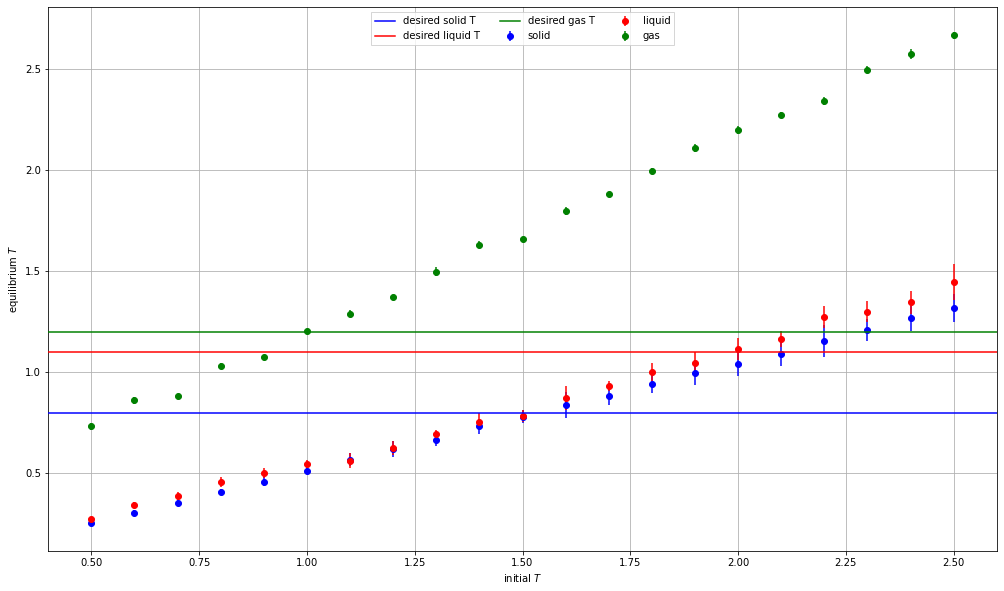

#	T_0	T	s_T

solid
0	0.5	0.254	0.016
1	0.6	0.304	0.012
2	0.7	0.354	0.018
3	0.8	0.409	0.016
4	0.9	0.458	0.023
5	1.0	0.513	0.014
6	1.1	0.567	0.033
7	1.2	0.619	0.040
8	1.3	0.666	0.032
9	1.4	0.731	0.037
10	1.5	0.778	0.032
11	1.6	0.839	0.064
12	1.7	0.883	0.047
13	1.8	0.944	0.047
14	1.9	0.997	0.062
15	2.0	1.042	0.060
16	2.1	1.090	0.057
17	2.2	1.155	0.080
18	2.3	1.208	0.056
19	2.4	1.267	0.061
20	2.5	1.319	0.069

liquid
0	0.5	0.273	0.012
1	0.6	0.345	0.012
2	0.7	0.390	0.015
3	0.8	0.454	0.025
4	0.9	0.501	0.023
5	1.0	0.545	0.021
6	1.1	0.563	0.039
7	1.2	0.624	0.035
8	1.3	0.695	0.019
9	1.4	0.756	0.040
10	1.5	0.783	0.028
11	1.6	0.874	0.059
12	1.7	0.931	0.027
13	1.8	1.000	0.046
14	1.9	1.043	0.057
15	2.0	1.115	0.054
16	2.1	1.165	0.041
17	2.2	1.272	0.054
18	2.3	1.299	0.052
19	2.4	1.346	0.057
20	2.5	1.446	0.090

gas
0	0.5	0.732	0.017
1	0.6	0.862	0.017
2	0.7	0.884	0.006
3	0.8	1.030	0.017
4	0.9	1.073	0.013
5	1.0	1.202	0.007
6	1.1	1.289	0.016
7	1.2	1.370	0.013
8	1.3	1.497	0.022
9	1.4	1.629	0.018
10	1.5	1.6

In [2]:
blocksize = 1000
T, std_T = dict(), dict()
for phase in phases:
    T[phase] = list()
    std_T[phase] = list()
    for key in calibration[phase].keys():
        #print(calibration[phase][key].iloc[-blocksize:])
        T[phase].append(calibration[phase][key]['ACTUAL_T:'].iloc[-blocksize:].mean())
        std_T[phase].append(calibration[phase][key]['ACTUAL_T:'].iloc[-blocksize:].std(ddof=0))
        
T0, colour = dict(), dict()
T0["solid"] = 0.8
T0["liquid"] = 1.1
T0["gas"] = 1.2
colour["solid"] = 'blue'
colour["liquid"] = 'red'
colour["gas"] = 'green'

plt.figure(figsize=(17,10))
for phase in phases:
    plt.errorbar((5+cycles[phase])/10, T[phase], yerr=std_T[phase], color=colour[phase], label=phase, fmt='o')
    plt.axhline(y=T0[phase], color=colour[phase], label=f'desired {phase} T', linestyle='-', zorder=3)
plt.xlabel('initial $T$')
plt.ylabel('equilibrium $T$')
plt.grid(True)
plt.legend(loc='upper center', ncol=3, fancybox=False)

plt.show()


print("#\tT_0\tT\ts_T")
for phase in phases:
    print()
    print(phase)
    for i in cycles[phase]:
        print(f"{i}\t{(i+5)/10:.1f}\t{T[phase][i]:.3f}\t{std_T[phase][i]:.3f}")


In [3]:
selected = dict()
for phase in phases:
    selected[phase] = 0
    for i in cycles[phase]:
        if np.abs(T[phase][i] - T0[phase]) < np.abs(T[phase][selected[phase]] - T0[phase]):
            selected[phase] = i
            
print("PHASE\tindex\tT_0\tT\ts_T")
for phase in phases:
    print(phase+f"\t{selected[phase]}\t{(selected[phase]+5)/10:.1f}\t{T[phase][selected[phase]]:.3f}\t{std_T[phase][selected[phase]]:.3f}")

print("\n#\ttarget\tT_block\tsigma_T")
for phase in phases:
    print(phase)
    total = int(blocks[phase]/blocksize)
    for i in range(total):
        Temp = calibration[phase][selected[phase]]['ACTUAL_T:'].iloc[i*blocksize:(i+1)*blocksize].mean()
        sigmaTemp = calibration[phase][selected[phase]]['ACTUAL_T:'].iloc[i*blocksize:(i+1)*blocksize].std(ddof=0)
        print(f"{i}\t{T[phase][selected[phase]]:.3f}\t{Temp:.3f}\t{sigmaTemp:.3f}")
        #if (i > 0 and np.abs(Temp - T[phase][selected[phase]]) < sigmaTemp):
        if (i > 0 and np.abs(Temp - T[phase][selected[phase]]) < std_T[phase][selected[phase]]):
            break

PHASE	index	T_0	T	s_T
solid	10	1.5	0.778	0.032
liquid	15	2.0	1.115	0.054
gas	5	1.0	1.202	0.007

#	target	T_block	sigma_T
solid
0	0.778	0.776	0.172
1	0.778	0.783	0.039
liquid
0	1.115	1.229	0.234
1	1.115	1.107	0.050
gas
0	1.202	1.011	0.014
1	1.202	1.105	0.042
2	1.202	1.166	0.017
3	1.202	1.198	0.016


I chose as my starting temperatures the values for which the equilibrium is closest to the desired temperature, which are 1.5 for the solid phase, 2.0 for the liquid phase and 1.0 for the gasseous phase. One could in theory get closer to the desired values with interpolation, but even in this case the fluctuations are generally greater than the discrepancy, as shown by the error values.

To perform my simulation i will use the usual 1000-steps sized blocks, so I just check what is the first block for which the mean is compatible with the equilibrium temperature (other than the very first block of course). For both the solid and liquid phase the drop in temperature is so sharp that the second block is already compatible, so I will just let the system equlibrate for 2 blocks before I start collecting data. For the gas phase the first block at equilibrium is the fourth, so I will let the system equilibrate for 4 blocks.

So I started the simulation from the original crystalline configuration and from the chosen initial temperature, and after the chosen equilibration time I restarted it and began data collection.

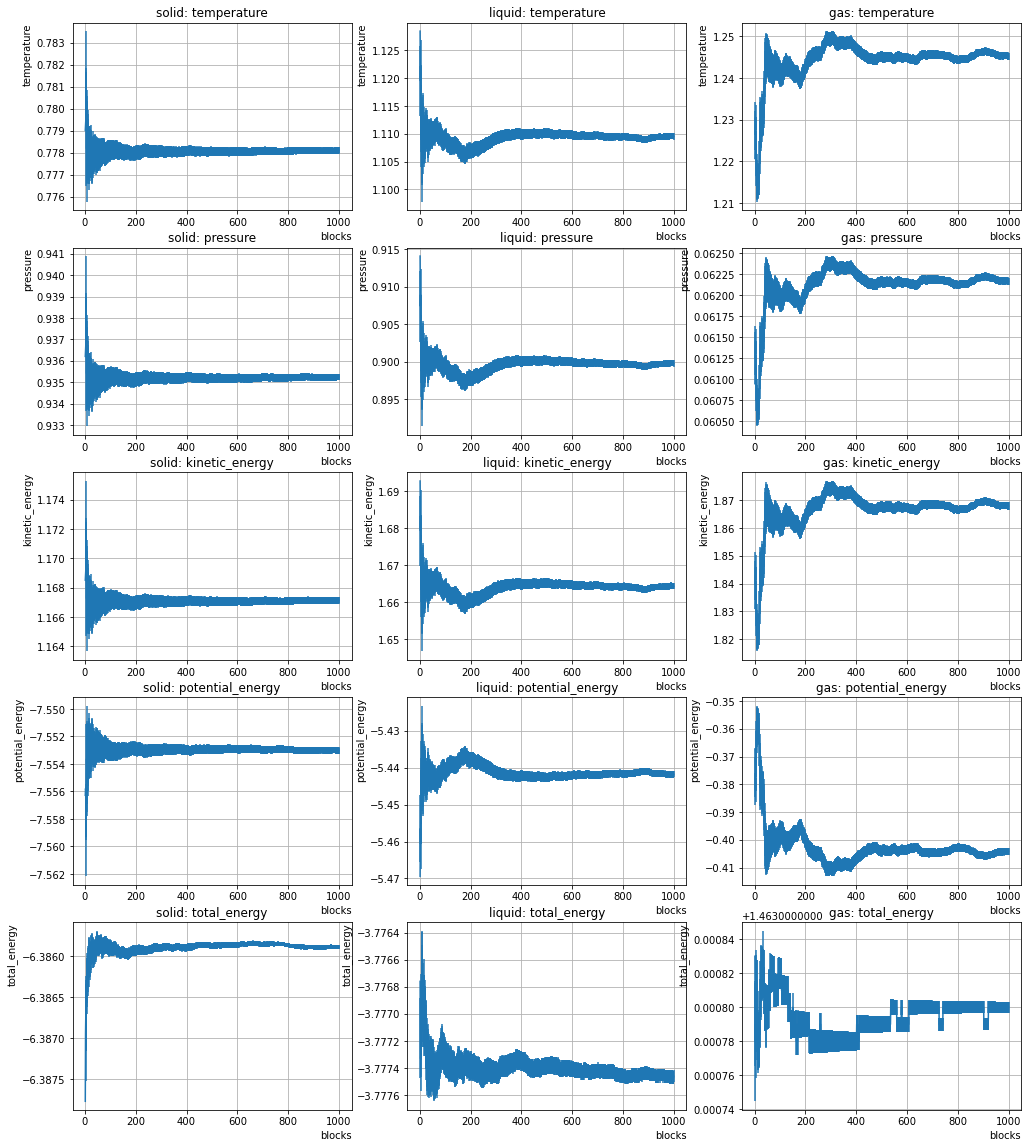

In [4]:
variables = ["temperature", "pressure", "kinetic_energy", "potential_energy", "total_energy"]
data = dict()
blocks = dict()
for variable in variables:
    data[variable] = dict()
    blocks[variable] = dict()
    for phase in phases:
        data[variable][phase] = pd.read_csv(f'md_{phase}/out/{variable}.dat', delimiter='\t')
        #print(data[variable][phase])
        blocks[variable][phase] = data[variable][phase].iloc[-1, 0]
        #print(temperature[phase])
    
#ax = dict()
fig, axs = plt.subplots(5, 3, figsize=(17,20))
for ax, variable in zip(axs, variables):
    for a, phase in zip(ax, phases):
        a.errorbar(data[variable][phase]['BLOCK:'], data[variable][phase].iloc[:,2], yerr=data[variable][phase]['ERROR:'])
        a.set_title(phase+': '+variable)
        a.set_xlabel('blocks', loc='right')
        a.set_ylabel(variable, loc='top')
        a.grid(True)
        #ax[variable].legend(loc='upper center', ncol=3, fancybox=False)
        #a.legend()
    
plt.show()

For all phases, the temperature, pressure and kinetic energy are proportional to each other, exactly as expected considering the formulas used to compute them. The potential energy curve has a shape that mirrors the kinetic energy one (still, as excpected) and the total energy is conserved, bar some small numerical fluctuations.